In [9]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
#Pull XRT (Retail ETF) data
ticker = "XRT" 
start= "1990-01-01" 
end= "2021-05-14"

retail = yf.download(ticker, start=start, end=end, progress=False)
retail = retail.asfreq(freq='D').ffill().dropna()
retail.to_csv('resources/retail.csv')
retail.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-06-22,18.530001,18.570,18.459999,18.559999,15.460639,10200.0
2006-06-23,18.645000,18.645,18.645000,18.645000,15.531434,50000.0
2006-06-24,18.645000,18.645,18.645000,18.645000,15.531434,50000.0
2006-06-25,18.645000,18.645,18.645000,18.645000,15.531434,50000.0
2006-06-26,18.645000,18.645,18.645000,18.645000,15.531434,0.0


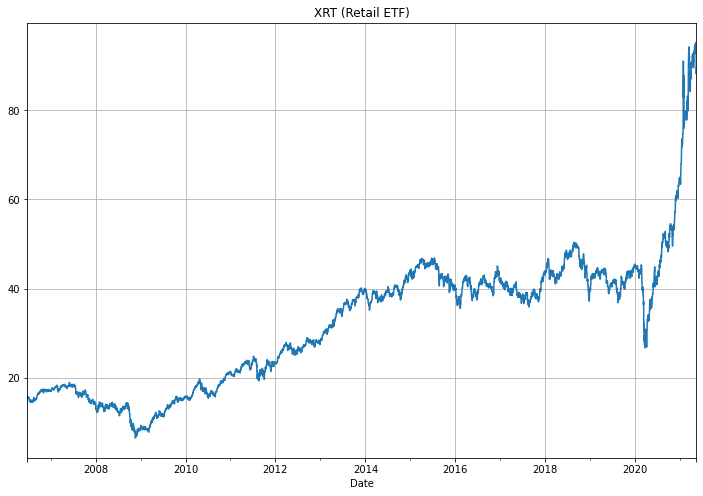

In [11]:
#Plot XRT historical prices
retail_plot = retail['Adj Close'].plot(figsize=(12,8), title='XRT (Retail ETF)', grid=True)

In [12]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "2006-06-22" 

sp_history = yf.download(ticker, start=start,progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.to_csv('resources/sp_history.csv')
sp_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-06-22,1251.920044,1251.920044,1241.530029,1245.599976,1245.599976,2.148180e+09
2006-06-23,1245.589966,1253.130005,1241.430054,1244.500000,1244.500000,2.017270e+09
2006-06-24,1245.589966,1253.130005,1241.430054,1244.500000,1244.500000,2.017270e+09
2006-06-25,1245.589966,1253.130005,1241.430054,1244.500000,1244.500000,2.017270e+09
2006-06-26,1244.500000,1250.920044,1243.680054,1250.560059,1250.560059,1.878580e+09


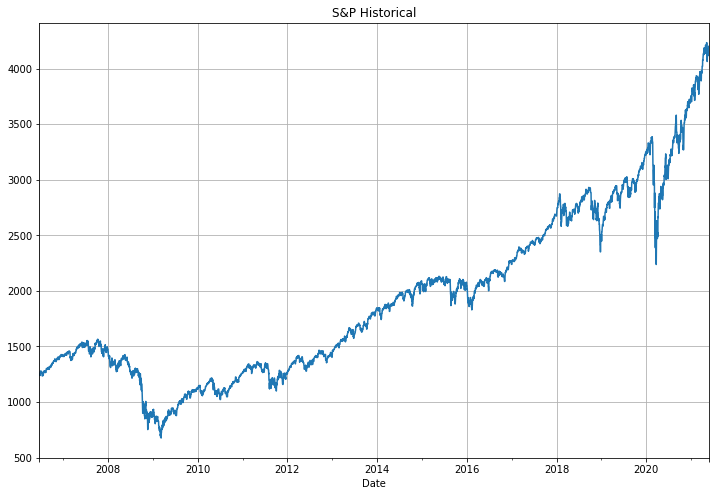

In [13]:
#Plot S&P Index historical data
sp_plot = sp_history['Adj Close'].plot(figsize=(12,8), title='S&P Historical', grid=True)

In [14]:
#Calculate XRT percent change and 200-day rolling average
retail_percent_change = retail['Adj Close'].pct_change()
retail_percent_change_rolling = retail_percent_change.rolling(window=200).mean()

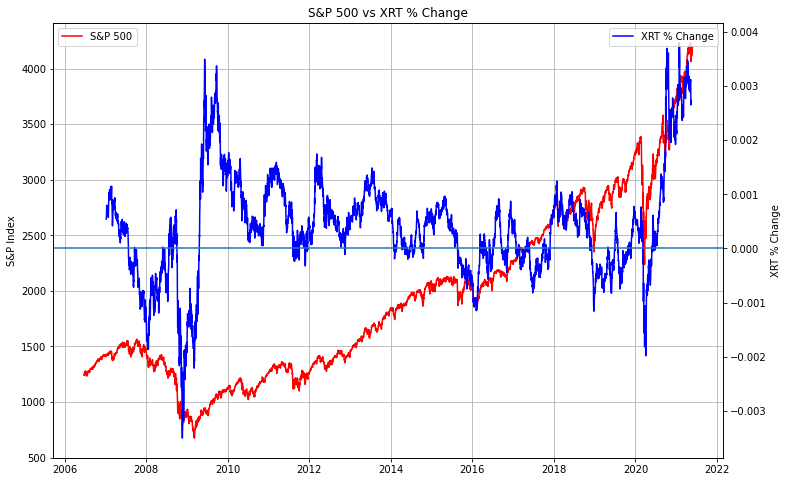

In [15]:
#Plot XRT percent change 200-day rolling average vs S&P 500 index to identify % change below and above y value of 0 
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P Index')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(retail_percent_change_rolling, label='XRT % Change', color='b')
ax.set_title('S&P 500 vs XRT % Change')
ax2.set_ylabel('XRT % Change')
ax2.axhline(y=0)
ax2.legend(loc='upper right')